In [2]:
import dask.dataframe as ddf
import pandas as pd
import datetime
import functools
import seaborn as sns
import matplotlib.pyplot as plt

### upload monthly population data

In [5]:
pop =ddf.read_csv("Population/population_monthly/population_monthly_*.csv",dtype={"fips":str}).compute().drop(columns={'Unnamed: 0'})
pop.head()

,year,fips,pop,month
0,1970,01001,22404,Jan
1,1970,01001,22520,Feb
2,1970,01001,22636,Mar
3,1970,01001,22752,Apr
4,1970,01001,22868,May


In [6]:
pop['year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004])

### upload monthly overall suicide death data(group by county of death)

In [11]:
suicide = ddf.read_csv("suicide_county_level/suicide_county_death/suicide_death_*.csv",dtype={'county_death': 'object'}).rename(columns={"county_death":"fips"}).compute().drop(columns={'Unnamed: 0'})
suicide.head()

,year,month,fips,suicide_death
0,1970,Dec,01001,1
1,1970,Jun,01001,1
2,1970,Mar,01001,1
3,1970,Sep,01001,1
4,1970,Jul,01002,1


In [12]:
suicide['year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004])

### Merge the population and suicide death in each county to calculate monthly suicide rates

In [13]:
pop.head()

,year,fips,pop,month
0,1970,01001,22404,Jan
1,1970,01001,22520,Feb
2,1970,01001,22636,Mar
3,1970,01001,22752,Apr
4,1970,01001,22868,May


In [14]:
pop.shape

(1307040, 4)

In [15]:
pop_suicide = pop.merge(suicide, on = ['year', 'month', 'fips'], how = 'left')
pop_suicide.head()

,year,fips,pop,month,suicide_death
0,1970,01001,22404,Jan,NaN
1,1970,01001,22520,Feb,NaN
2,1970,01001,22636,Mar,1.0
3,1970,01001,22752,Apr,NaN
4,1970,01001,22868,May,NaN


In [16]:
pop_suicide.shape

(1307040, 5)

In [17]:
pop_suicide['suicide_death'] = pop_suicide['suicide_death'].fillna(0)

In [18]:
pop_suicide.head()

,year,fips,pop,month,suicide_death
0,1970,01001,22404,Jan,0.0
1,1970,01001,22520,Feb,0.0
2,1970,01001,22636,Mar,1.0
3,1970,01001,22752,Apr,0.0
4,1970,01001,22868,May,0.0


In [19]:
pop_suicide['SuicideRate'] = (pop_suicide['suicide_death'] / pop_suicide['pop'])* 100000
pop_suicide.head()

,year,fips,pop,month,suicide_death,SuicideRate
0,1970,01001,22404,Jan,0.0,0.000000
1,1970,01001,22520,Feb,0.0,0.000000
2,1970,01001,22636,Mar,1.0,4.417742
3,1970,01001,22752,Apr,0.0,0.000000
4,1970,01001,22868,May,0.0,0.000000


### upload temp_bins data from 1970 to 2004

In [20]:
temp = ddf.read_csv('Temp_Bins/temp_bins_test/temp_bins_monthly_*.csv', dtype = {'fips': str}).compute().drop(columns={'Unnamed: 0'})
temp.head()

,fips,year,month,mean_temp_below_30,mean_temp_30-40,mean_temp_40-50,mean_temp_50-60,mean_temp_60-70,mean_temp_70-80,mean_temp_80-90,...,min_temp_80-90,min_temp_over_90,max_temp_below_30,max_temp_30-40,max_temp_40-50,max_temp_50-60,max_temp_60-70,max_temp_70-80,max_temp_80-90,max_temp_over_90
0,01001,1970,Apr,0,0,0,2,16,12,0,...,0,0,0,0,0,0,2,10,16,2
1,01001,1970,Aug,0,0,0,0,0,18,13,...,0,0,0,0,0,0,0,1,15,15
2,01001,1970,Dec,0,2,12,8,8,1,0,...,0,0,0,0,2,11,6,11,1,0
3,01001,1970,Feb,1,2,15,9,1,0,0,...,0,0,0,0,1,11,14,2,0,0
4,01001,1970,Jan,6,9,10,3,3,0,0,...,0,0,1,5,9,10,2,4,0,0


In [21]:
temp.columns

Index(['fips', 'year', 'month', 'mean_temp_below_30', 'mean_temp_30-40',
       'mean_temp_40-50', 'mean_temp_50-60', 'mean_temp_60-70',
       'mean_temp_70-80', 'mean_temp_80-90', 'mean_temp_over_90',
       'min_temp_below_30', 'min_temp_30-40', 'min_temp_40-50',
       'min_temp_50-60', 'min_temp_60-70', 'min_temp_70-80', 'min_temp_80-90',
       'min_temp_over_90', 'max_temp_below_30', 'max_temp_30-40',
       'max_temp_40-50', 'max_temp_50-60', 'max_temp_60-70', 'max_temp_70-80',
       'max_temp_80-90', 'max_temp_over_90'],
      dtype='object')

In [23]:
columns_mean_temp = ['fips', 'year', 'month', 'mean_temp_below_30', 'mean_temp_30-40','mean_temp_40-50', 
                     'mean_temp_50-60', 'mean_temp_60-70','mean_temp_70-80', 'mean_temp_80-90', 'mean_temp_over_90']
columns_min_temp = ['fips', 'year', 'month', 'min_temp_below_30', 'min_temp_30-40', 'min_temp_40-50', 
                    'min_temp_50-60', 'min_temp_60-70', 'min_temp_70-80', 'min_temp_80-90','min_temp_over_90']
columns_max_temp = ['fips', 'year', 'month', 'max_temp_below_30', 'max_temp_30-40','max_temp_40-50',
                    'max_temp_50-60', 'max_temp_60-70', 'max_temp_70-80','max_temp_80-90', 'max_temp_over_90']
mean_temp = temp[columns_mean_temp]
min_temp = temp[columns_min_temp]
max_temp = temp[columns_max_temp]

#### test mean_temp first

In [26]:
mean_temp.head()

,fips,year,month,mean_temp_below_30,mean_temp_30-40,mean_temp_40-50,mean_temp_50-60,mean_temp_60-70,mean_temp_70-80,mean_temp_80-90,mean_temp_over_90
0,01001,1970,Apr,0,0,0,2,16,12,0,0
1,01001,1970,Aug,0,0,0,0,0,18,13,0
2,01001,1970,Dec,0,2,12,8,8,1,0,0
3,01001,1970,Feb,1,2,15,9,1,0,0,0
4,01001,1970,Jan,6,9,10,3,3,0,0,0


In [27]:
mean_temp.shape

(1316331, 11)

In [28]:
pop_suicide.shape

(1307040, 6)

In [29]:
test_mean = mean_temp.merge( pop_suicide, how='inner', on=['fips', 'year', 'month'])
test_mean.head()

,fips,year,month,mean_temp_below_30,mean_temp_30-40,mean_temp_40-50,mean_temp_50-60,mean_temp_60-70,mean_temp_70-80,mean_temp_80-90,mean_temp_over_90,pop,suicide_death,SuicideRate
0,01001,1970,Apr,0,0,0,2,16,12,0,0,22752,0.0,0.000000
1,01001,1970,Aug,0,0,0,0,0,18,13,0,23216,0.0,0.000000
2,01001,1970,Dec,0,2,12,8,8,1,0,0,23680,1.0,4.222973
3,01001,1970,Feb,1,2,15,9,1,0,0,0,22520,0.0,0.000000
4,01001,1970,Jan,6,9,10,3,3,0,0,0,22404,0.0,0.000000


In [30]:
# Import Package
import statsmodels.api as sm
from statsmodels.api import add_constant

X = test_mean[['mean_temp_below_30', 'mean_temp_30-40', 'mean_temp_40-50','mean_temp_50-60','mean_temp_60-70', 'mean_temp_70-80','mean_temp_80-90', 'mean_temp_over_90']]
y= test_mean['SuicideRate']
model = sm.OLS(y,X)
results = model.fit()

# MSE of the residuals
print(f"MSE: {results.mse_resid}")

# Output Results
results.summary()

MSE: 423.6983832106066


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            SuicideRate   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              1083.
Date:                Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                        10:41:54   Log-Likelihood:                     -5.6191e+06
No. Observations:             1264585   AIC:                                  1.124e+07
Df Residuals:                 1264577   BIC:                                  1.124e+07
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
mean_temp_below_30     0.0512      0.003     16.447      0.000       0.045       0.057
mean_temp_30-40        0.0784      0.005     17.385      0.000       0.070       0.087
mean_temp_40-50        0.0636      0.004     14.451      0.000       0.055       0.072
mean_temp_50-60        0.0407      0.004     10.030      0.000       0.033       0.049
mean_temp_60-70        0.0637      0.003     19.449      0.000       0.057       0.070
mean_temp_70-80        0.0419      0.002     17.066      0.000       0.037       0.047
mean_temp_80-90        0.0676      0.004     18.676      0.000       0.060       0.075
mean_temp_over_90      0.0828      0.023      3.671      0.000       0.039       0.127
==============================================================================
Omnibus:                  3200162.787   Durbin-Watson:                   0.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      62371769427.766
Skew:                          28.372   Prob(JB):                         0.00
Kurtosis:                    1089.511   Cond. No.                         15.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
err_series = results.params - results.conf_int()[0]
coef_df = pd.DataFrame({'coef': results.params.values[0:],
                        'err': err_series.values[0:],
                        'varname': err_series.index.values[0:]
                       })
coef_df

,coef,err,varname
0,0.051202,0.006102,mean_temp_below_30
1,0.078426,0.008842,mean_temp_30-40
2,0.063622,0.008629,mean_temp_40-50
3,0.040734,0.007960,mean_temp_50-60
4,0.063661,0.006415,mean_temp_60-70
5,0.041946,0.004817,mean_temp_70-80
6,0.067572,0.007091,mean_temp_80-90
7,0.082848,0.044239,mean_temp_over_90


/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


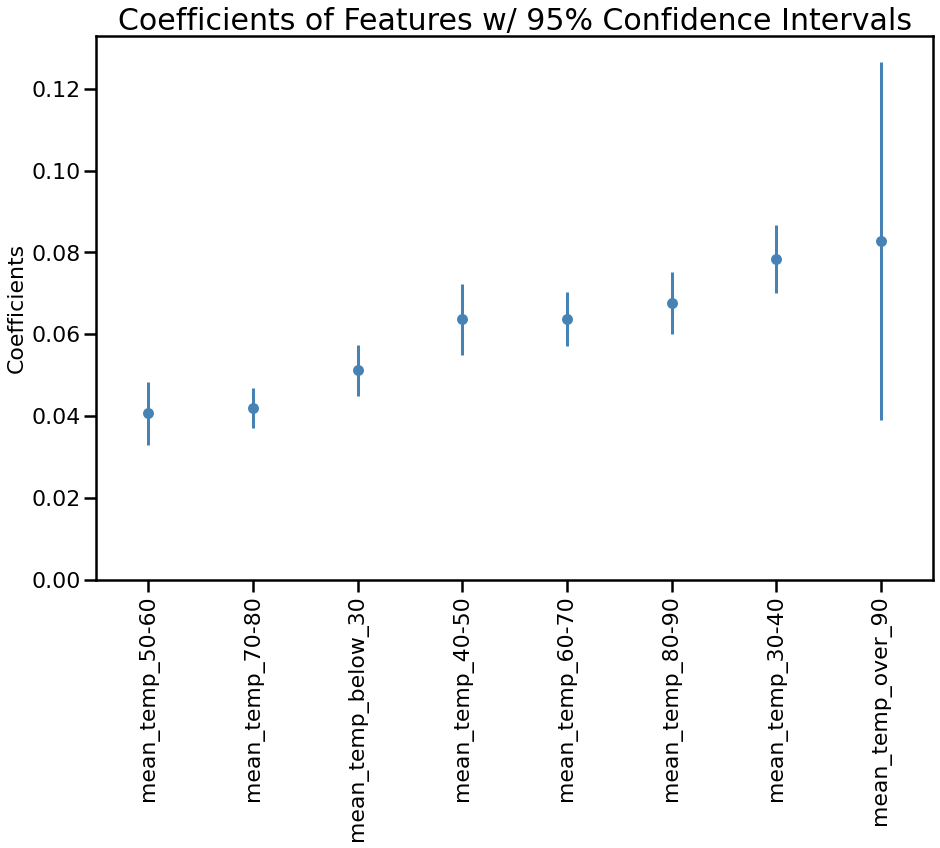

In [32]:
def coefplot(results):
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    coef_df.columns = coef_df.iloc[0]
    coef_df=coef_df.drop(0)
    coef_df = coef_df.set_index(coef_df.columns[0])
    coef_df = coef_df.astype(float)
    errors = coef_df['coef'] - coef_df['[0.025']
    coef_df['errors'] = errors
#     coef_df = coef_df.drop(['const'])
    coef_df = coef_df.sort_values(by=['coef'])
    variables = list(coef_df.index.values)
    coef_df['variables'] = variables
    sn.set_context("poster")
    fig, ax = plt.subplots(figsize=(15, 10))
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()
coefplot(results)

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


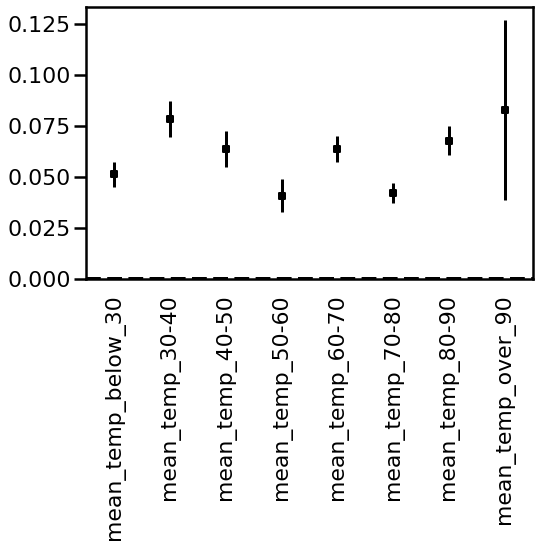

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=30, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
# _ = ax.set_xticklabels(['Agriculture', 'Exam', 'Edu.', 'Catholic', 'Infant Mort.'], 
#                        rotation=0, fontsize=16)

### test min_temp data

In [34]:
test_min = min_temp.merge( pop_suicide, how='inner', on=['fips', 'year', 'month'])
test_min.head()

,fips,year,month,min_temp_below_30,min_temp_30-40,min_temp_40-50,min_temp_50-60,min_temp_60-70,min_temp_70-80,min_temp_80-90,min_temp_over_90,pop,suicide_death,SuicideRate
0,01001,1970,Apr,0,1,5,12,9,3,0,0,22752,0.0,0.000000
1,01001,1970,Aug,0,0,0,0,1,30,0,0,23216,0.0,0.000000
2,01001,1970,Dec,3,12,7,6,3,0,0,0,23680,1.0,4.222973
3,01001,1970,Feb,7,13,7,1,0,0,0,0,22520,0.0,0.000000
4,01001,1970,Jan,12,11,5,3,0,0,0,0,22404,0.0,0.000000


In [35]:
# Import Package
import statsmodels.api as sm
from statsmodels.api import add_constant

X = test_min[['min_temp_below_30', 'min_temp_30-40', 'min_temp_40-50','min_temp_50-60','min_temp_60-70', 'min_temp_70-80','min_temp_80-90', 'min_temp_over_90']]
y= test_min['SuicideRate']
model = sm.OLS(y,X)
results = model.fit()

# MSE of the residuals
print(f"MSE: {results.mse_resid}")

# Output Results
results.summary()

MSE: 423.66012223741956


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            SuicideRate   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              1097.
Date:                Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                        12:17:16   Log-Likelihood:                     -5.6191e+06
No. Observations:             1264585   AIC:                                  1.124e+07
Df Residuals:                 1264577   BIC:                                  1.124e+07
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
min_temp_below_30     0.0723      0.002     37.071      0.000       0.069       0.076
min_temp_30-40        0.0681      0.004     18.994      0.000       0.061       0.075
min_temp_40-50        0.0321      0.004      7.395      0.000       0.024       0.041
min_temp_50-60        0.0742      0.004     20.410      0.000       0.067       0.081
min_temp_60-70        0.0303      0.003     10.593      0.000       0.025       0.036
min_temp_70-80        0.0534      0.003     17.704      0.000       0.047       0.059
min_temp_80-90        0.0646      0.031      2.112      0.035       0.005       0.124
min_temp_over_90     -0.1604      0.342     -0.469      0.639      -0.830       0.510
==============================================================================
Omnibus:                  3199853.995   Durbin-Watson:                   0.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      62325114344.468
Skew:                          28.365   Prob(JB):                         0.00
Kurtosis:                    1089.104   Cond. No.                         239.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
err_series = results.params - results.conf_int()[0]
coef_df = pd.DataFrame({'coef': results.params.values[0:],
                        'err': err_series.values[0:],
                        'varname': err_series.index.values[0:]
                       })
coef_df

,coef,err,varname
0,0.072336,0.003824,min_temp_below_30
1,0.068098,0.007027,min_temp_30-40
2,0.032110,0.008510,min_temp_40-50
3,0.074233,0.007128,min_temp_50-60
4,0.030259,0.005599,min_temp_60-70
5,0.053411,0.005913,min_temp_70-80
6,0.064566,0.059919,min_temp_80-90
7,-0.160425,0.670045,min_temp_over_90


/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


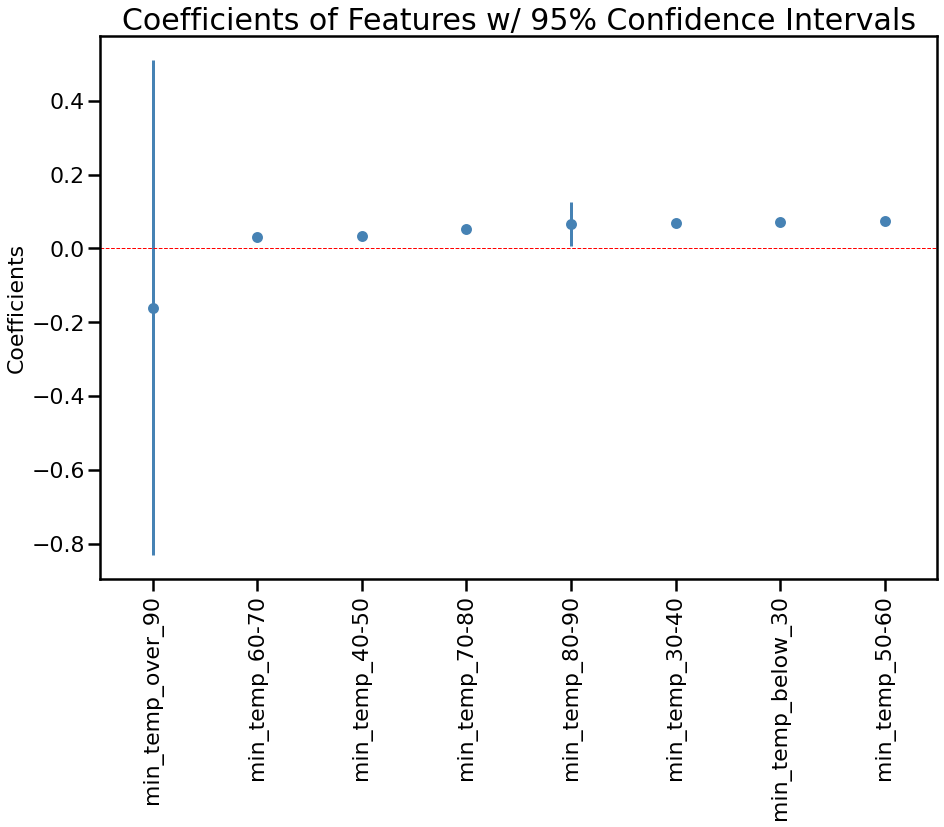

In [37]:
def coefplot(results):
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    coef_df.columns = coef_df.iloc[0]
    coef_df=coef_df.drop(0)
    coef_df = coef_df.set_index(coef_df.columns[0])
    coef_df = coef_df.astype(float)
    errors = coef_df['coef'] - coef_df['[0.025']
    coef_df['errors'] = errors
#     coef_df = coef_df.drop(['const'])
    coef_df = coef_df.sort_values(by=['coef'])
    variables = list(coef_df.index.values)
    coef_df['variables'] = variables
    sn.set_context("poster")
    fig, ax = plt.subplots(figsize=(15, 10))
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()
coefplot(results)

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


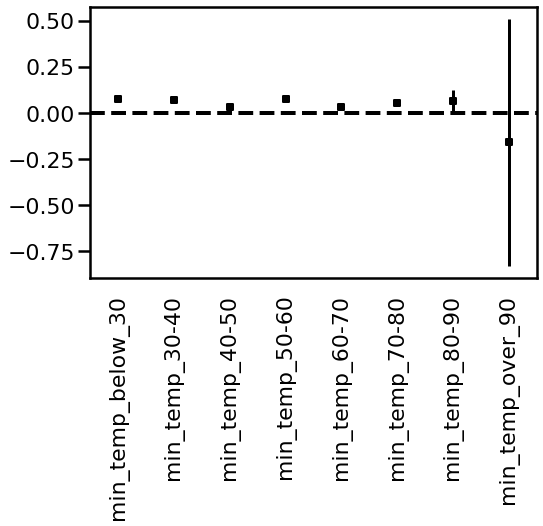

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=30, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
# _ = ax.set_xticklabels(['Agriculture', 'Exam', 'Edu.', 'Catholic', 'Infant Mort.'], 
#                        rotation=0, fontsize=16)

### test for max_temp

In [39]:
test_max = max_temp.merge( pop_suicide, how='inner', on=['fips', 'year', 'month'])
test_max.head()

,fips,year,month,max_temp_below_30,max_temp_30-40,max_temp_40-50,max_temp_50-60,max_temp_60-70,max_temp_70-80,max_temp_80-90,max_temp_over_90,pop,suicide_death,SuicideRate
0,01001,1970,Apr,0,0,0,0,2,10,16,2,22752,0.0,0.000000
1,01001,1970,Aug,0,0,0,0,0,1,15,15,23216,0.0,0.000000
2,01001,1970,Dec,0,0,2,11,6,11,1,0,23680,1.0,4.222973
3,01001,1970,Feb,0,0,1,11,14,2,0,0,22520,0.0,0.000000
4,01001,1970,Jan,1,5,9,10,2,4,0,0,22404,0.0,0.000000


In [40]:
# Import Package
import statsmodels.api as sm
from statsmodels.api import add_constant

X = test_max[['max_temp_below_30', 'max_temp_30-40', 'max_temp_40-50','max_temp_50-60','max_temp_60-70', 'max_temp_70-80','max_temp_80-90', 'max_temp_over_90']]
y= test_max['SuicideRate']
model = sm.OLS(y,X)
results = model.fit()

# MSE of the residuals
print(f"MSE: {results.mse_resid}")

# Output Results
results.summary()

MSE: 423.6932045618764


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            SuicideRate   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              1085.
Date:                Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                        12:21:35   Log-Likelihood:                     -5.6191e+06
No. Observations:             1264585   AIC:                                  1.124e+07
Df Residuals:                 1264577   BIC:                                  1.124e+07
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
max_temp_below_30     0.0386      0.005      7.295      0.000       0.028       0.049
max_temp_30-40        0.0603      0.006     10.131      0.000       0.049       0.072
max_temp_40-50        0.0662      0.006     10.632      0.000       0.054       0.078
max_temp_50-60        0.0777      0.005     14.712      0.000       0.067       0.088
max_temp_60-70        0.0432      0.005      9.363      0.000       0.034       0.052
max_temp_70-80        0.0594      0.003     17.031      0.000       0.053       0.066
max_temp_80-90        0.0395      0.002     15.842      0.000       0.035       0.044
max_temp_over_90      0.0747      0.003     27.634      0.000       0.069       0.080
==============================================================================
Omnibus:                  3200159.730   Durbin-Watson:                   0.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      62374372201.457
Skew:                          28.372   Prob(JB):                         0.00
Kurtosis:                    1089.534   Cond. No.                         5.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
err_series = results.params - results.conf_int()[0]
coef_df = pd.DataFrame({'coef': results.params.values[0:],
                        'err': err_series.values[0:],
                        'varname': err_series.index.values[0:]
                       })
coef_df

,coef,err,varname
0,0.038607,0.010372,max_temp_below_30
1,0.060293,0.011664,max_temp_30-40
2,0.066249,0.012213,max_temp_40-50
3,0.077743,0.010357,max_temp_50-60
4,0.043177,0.009038,max_temp_60-70
5,0.059433,0.006840,max_temp_70-80
6,0.039513,0.004889,max_temp_80-90
7,0.074688,0.005297,max_temp_over_90


/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


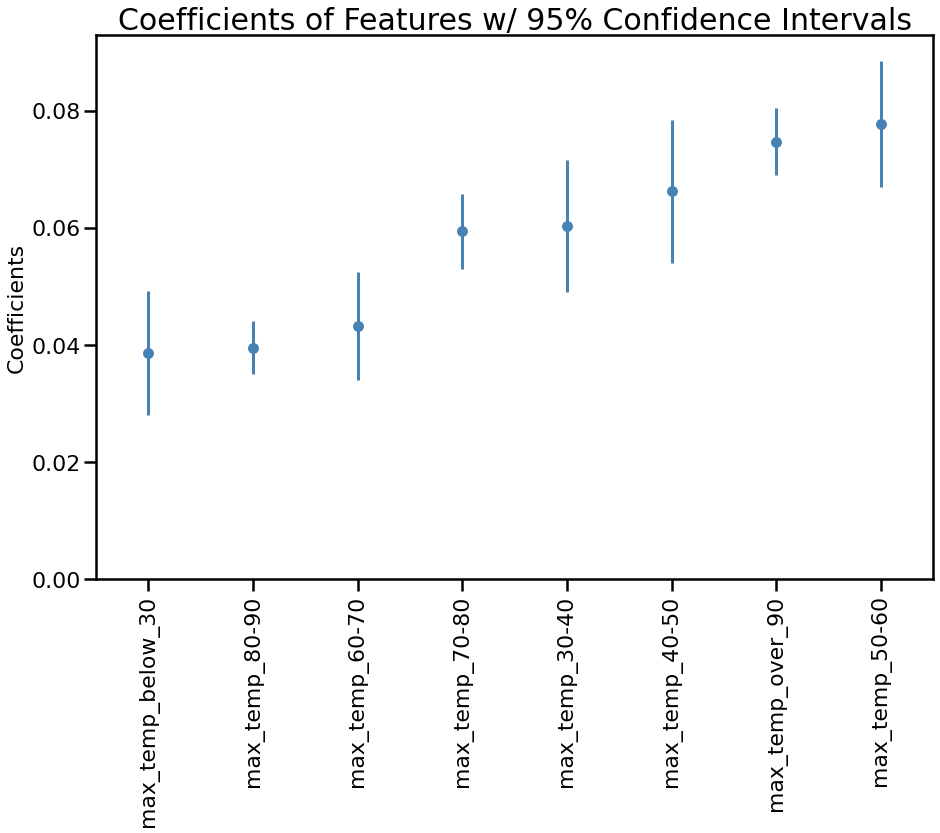

In [42]:
def coefplot(results):
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    coef_df.columns = coef_df.iloc[0]
    coef_df=coef_df.drop(0)
    coef_df = coef_df.set_index(coef_df.columns[0])
    coef_df = coef_df.astype(float)
    errors = coef_df['coef'] - coef_df['[0.025']
    coef_df['errors'] = errors
#     coef_df = coef_df.drop(['const'])
    coef_df = coef_df.sort_values(by=['coef'])
    variables = list(coef_df.index.values)
    coef_df['variables'] = variables
    sn.set_context("poster")
    fig, ax = plt.subplots(figsize=(15, 10))
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()
coefplot(results)

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


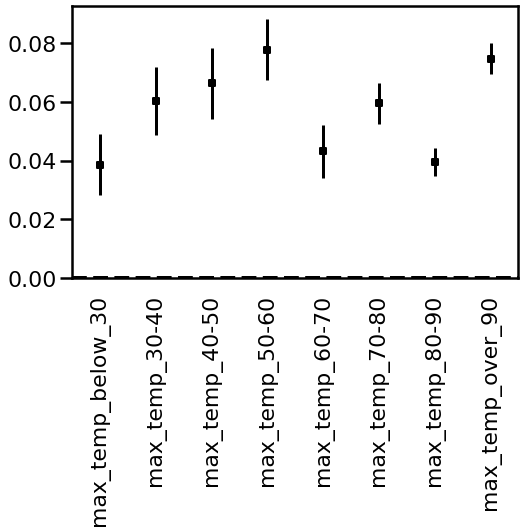

In [43]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=30, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
# _ = ax.set_xticklabels(['Agriculture', 'Exam', 'Edu.', 'Catholic', 'Infant Mort.'], 
#                        rotation=0, fontsize=16)